<a href="https://colab.research.google.com/github/hurricane195/Intro-to-Deep-Learning/blob/Homework_1/HW1_P1A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Develop a multi-layer perceptron with three hidden layers (you pick the dimensions of the hidden layers) for the CIFAR-10 dataset.**

**1.a. Train the model from scratch (with randomized parameters) and plot the results (training loss and accuracy, validation accuracy) after 20 epochs. Does your network need more epochs for full training? Do you observe overfitting? Make sure to save the trained parameters and model. Report and plot your training and validation results. Report precision, recall, F1 score, and confusion matrix.**

In [ ]:
#Building off Homework 6 Problem 2B submitted for Intro to ML
#Using modified CIFAR-10 example from 'Deep-Learning-with_PyTorch' in Chapter 8 'Using Convolutions to generalize'.
#Using modified CIFAR-10 example from 'Deep-Learning-with_PyTorch' in Chapter 7 'Telling Birds from airplanes: Learning from images'.
#Using modified Temperature example from 'Deep-Learning-with_PyTorch' in Chapter 6 'Using a neural network to fit the data'.
#Using a modided example of Dr. Tabkhi's "FashinMNIST" available at https://github.com/HamedTabkhi/Intro-to-DL/blob/main/FashinMNIST.py
#Help from ChatGPT
#Help from Google Colab AI assist with Colab Pro

In [ ]:
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from torch.utils.data import Dataset, DataLoader
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, accuracy_score

from torchvision import datasets, transforms
from matplotlib import pyplot as plt
import numpy as np
import random
from sklearn.preprocessing import MinMaxScaler, StandardScaler

import time
import datetime

In [ ]:
data_path = '../data-unversioned/p1ch7/'
CIFAR10 = datasets.CIFAR10(data_path, train = True, download = True)
#test_dataset = datasets.CIFAR10(data_path, train = False, download = True)

Files already downloaded and verified


In [ ]:
classes = CIFAR10.classes
classes

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

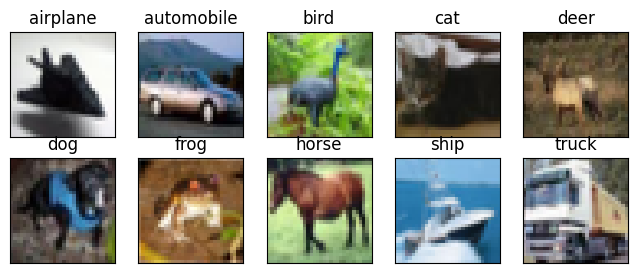

In [ ]:
class_names = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
fig = plt.figure(figsize=(8,3))
num_classes = 10
for i in range(num_classes):
    ax = fig.add_subplot(2,5,1+i, xticks=[], yticks=[])
    ax.set_title(class_names[i])
    #ax.set_title(le.fit(class_names))
    img = next(img for img, label in CIFAR10 if label ==i)
    plt.imshow(img)
plt.show()

In [ ]:
tensor_train_dataset = datasets.CIFAR10(data_path, train=True, download=False, transform=transforms.ToTensor())

In [ ]:
to_tensor = transforms.ToTensor()
img_t = to_tensor(img)
img_t.shape

torch.Size([3, 32, 32])

In [ ]:
imgs = torch.stack([img_t for img_t, _ in tensor_train_dataset], dim=3)
imgs.shape

torch.Size([3, 32, 32, 50000])

In [ ]:
imgs.view(3, -1).mean(dim=1)

tensor([0.4914, 0.4822, 0.4465])

In [ ]:
imgs.view(3, -1).std(dim=1)

tensor([0.2470, 0.2435, 0.2616])

In [ ]:
train_dataset = datasets.CIFAR10(data_path, train=True, download=False, transform=transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.4915, 0.4823, 0.4468), (0.2470, 0.2435, 0.2616))]))
test_dataset = datasets.CIFAR10(data_path, train=False, download=False,transform=transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.4915, 0.4823, 0.4468),(0.2470, 0.2435, 0.2616))]))

In [ ]:
# Data loaders
train_loader = DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=64, shuffle=False)

In [ ]:
# Neural network model
class CIFAR10Net(nn.Module):
    def __init__(self):
        super(CIFAR10Net, self).__init__()
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(3072, 1024)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(1024, 512)
        self.relu = nn.ReLU()
        self.fc3 = nn.Linear(512, 128)
        self.relu = nn.ReLU()
        self.fc4 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.flatten(x)
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.relu(x)
        x = self.fc3(x)
        x = self.relu(x)
        x = self.fc4(x)
        return x

In [ ]:
# Check if GPU is available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f'Using device: {device}')

Using device: cuda


In [ ]:
# Define the model and move it to the GPU if available
model = CIFAR10Net().to(device)

In [ ]:
# Loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

Epoch [1/20], Training Loss: 2.0317, Training Accuracy: 28.19%, Validation Accuracy: 35.49%
Epoch [2/20], Training Loss: 1.6981, Training Accuracy: 39.87%, Validation Accuracy: 42.33%
Epoch [3/20], Training Loss: 1.5591, Training Accuracy: 45.12%, Validation Accuracy: 46.67%
Epoch [4/20], Training Loss: 1.4599, Training Accuracy: 48.40%, Validation Accuracy: 48.38%
Epoch [5/20], Training Loss: 1.3800, Training Accuracy: 51.27%, Validation Accuracy: 48.80%
Epoch [6/20], Training Loss: 1.3142, Training Accuracy: 53.81%, Validation Accuracy: 50.14%
Epoch [7/20], Training Loss: 1.2551, Training Accuracy: 55.96%, Validation Accuracy: 50.30%
Epoch [8/20], Training Loss: 1.2010, Training Accuracy: 57.74%, Validation Accuracy: 49.67%
Epoch [9/20], Training Loss: 1.1480, Training Accuracy: 59.48%, Validation Accuracy: 51.32%
Epoch [10/20], Training Loss: 1.0996, Training Accuracy: 61.52%, Validation Accuracy: 50.78%
Epoch [11/20], Training Loss: 1.0529, Training Accuracy: 62.94%, Validation Acc

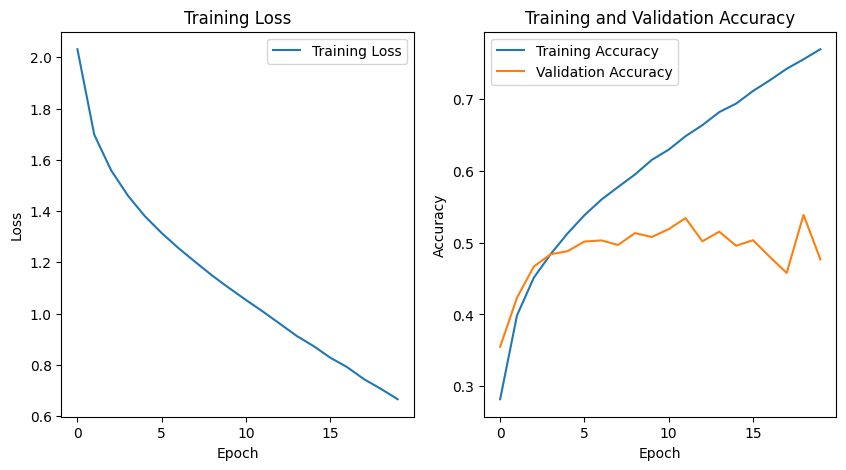

In [ ]:
start_training = time.time()

# Training the model
train_losses = []
train_accuracy = []
val_accuracy = []


# Training loop
num_epochs = 20
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct_train = 0
    total_train = 0
    for inputs, targets in train_loader:
         # Move data to GPU
        inputs, targets = inputs.to(device), targets.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        _, predicted = torch.max(outputs, 1)
        total_train += targets.size(0)
        correct_train += (predicted == targets).sum().item()

    train_losses.append(running_loss / len(train_loader))
    train_accuracy.append(correct_train / total_train)

  # Validation
    model.eval()
    correct_val = 0
    total_val = 0
    with torch.no_grad():
        for inputs, targets in test_loader:
            inputs = inputs.to(device)
            targets = targets.to(device)

            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)
            total_val += targets.size(0)
            correct_val += (predicted == targets).sum().item()
    main_toc = time.perf_counter()

    val_accuracy.append(correct_val / total_val)


    print(f'Epoch [{epoch+1}/{num_epochs}], '
          f'Training Loss: {train_losses[-1]:.4f}, '
          f'Training Accuracy: {train_accuracy[-1]*100:.2f}%, '
          f'Validation Accuracy: {val_accuracy[-1]*100:.2f}%')

# Display training time
print('')
print('Training time:   {:.2f}s'.format(time.time() - start_training))
print('')

# Plotting
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

# Save trained model
torch.save(model.state_dict(), 'CIFAR10_model.pth')

In [ ]:
# Evaluation
model.eval()
predictions = []
true_labels = []
with torch.no_grad():
    for inputs, targets in test_loader:
        inputs = inputs.to(device)
        targets = targets.to(device)
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        predictions.extend(predicted.cpu().numpy())
        true_labels.extend(targets.cpu().numpy())

# Calculate metrics
precision = precision_score(true_labels, predictions, average='weighted')
recall = recall_score(true_labels, predictions, average='weighted')
f1 = f1_score(true_labels, predictions, average='weighted')
accuracy = accuracy_score(true_labels, predictions)
conf_matrix = confusion_matrix(true_labels, predictions)

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Accuracy:", accuracy)
print("")
print("Confusion Matrix:")
print(conf_matrix)

Precision: 0.5233592385923245
Recall: 0.4766
F1 Score: 0.4767626602868475
Accuracy: 0.4766

Confusion Matrix:
[[465  70  64  73  22  39 104  16 126  21]
 [ 17 721  32  27   9  45  41  13  36  59]
 [ 46  14 352  90  88 229 123  39  16   3]
 [  3  18  67 200  28 492 149  28   6   9]
 [ 20   9 152  43 325 233 115  79  18   6]
 [  6   8  45 111  35 662  79  41   9   4]
 [  3  19  84  60  31 218 556  14   7   8]
 [ 18  19  43  66  46 191  67 528  15   7]
 [ 47 115  26  28  14  41  85   8 624  12]
 [ 32 291  24  57   7  65 124  30  37 333]]
